In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

SIZE = 100
SCALE = 0.5

class Gradient_descent:
    def __init__(self, learning_rate = 0.01, iterations = 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        b = 0
        m = 5
        print(f"shape of X is {X.shape}")
        n = X.shape[0]
        for _ in range(self.iterations):
            ### MSE = (1/n) * sigma (y - (mx + b))^2
            cost_function = (1/n) * np.sum(y - ( m * X + b))

            ### d(MSE)/dm = (2/n) * sigma (y - (mx + b)) * (-x)
            ### d(MSE)/db = (2/n) * sigma (y - (mx + b)) * (-1)
            m_gradient = -2 * np.sum(X * (y - (m * X + b))) / n
            b_gradient = -2 * np.sum(y - (m * X + b)) / n

            m = m - (self.learning_rate * m_gradient)
            b = b - (self.learning_rate * b_gradient)

            self.m = m
            self.b = b

        # return self.m, self.b

    def predict(self, X):
        return self.m * X + self.b



In [2]:


def generate_data(size, scale):
    np.random.seed(42)
    X =   np.array(sorted(list(range(int(size / 20))) * 20)) + np.random.normal(size = size, scale = scale)
    y =   np.array(sorted(list(range(int(size / 20))) * 20)) + np.random.normal(size = size, scale = scale * 0.5)
    return X, y

X, y = generate_data(SIZE, SCALE)
print(X[:9])
print(y[:9])

[ 0.24835708 -0.06913215  0.32384427  0.76151493 -0.11707669 -0.11706848
  0.78960641  0.38371736 -0.23473719]
[-0.35384269 -0.10516133 -0.08567863 -0.20056932 -0.04032143  0.10101271
  0.47154648  0.04364445  0.0643876 ]


In [3]:
# X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
# y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

In [4]:
reg_model = Gradient_descent(learning_rate = 0.01, iterations = 1000)
reg_model.fit(X, y)

print(f"model parameters are {reg_model.m}, {reg_model.b}")

shape of X is (100,)
model parameters are 0.8818268579385155, 0.28716622513970586


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

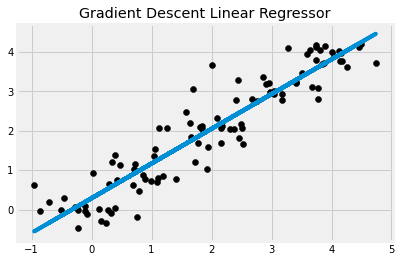

In [5]:
plt.scatter(X, y, color = 'black')
plt.plot(X, reg_model.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

# plt.show()